Activation Functions allow your NN to model non linear problems. All of your NNs in the previous lessons have NOT had an activation function and will not do well with non linear datasets.

What are some of the common activation functions?
- Sigmoid
- Tanh
- ReLU (most popular)

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Tensorflow version 1.2.1
Pandas version 0.20.1
Numpy version 1.12.1


In [2]:
# Function to model

# y = a * x^2 + b * x + c  

# Let's generate 1000 random samples
pool = np.random.rand(1000,1).astype(np.float32)

# Shuffle the samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000 * 0.15)

# 15% test
test_x = pool[0:sample]

# 85% training
train_x = pool[sample:]

print('Testing data points: ' + str(test_x.shape))
print('Training data points: ' + str(train_x.shape))

# Let's compute the ouput using 2 for a, 3 for b, and 5 for c
test_y = 2.0 * test_x**2 + 3.0 * test_x + 5
train_y = 2.0 * train_x**2 + 3.0 * train_x + 5

Testing data points: (150, 1)
Training data points: (850, 1)


In [3]:
df = pd.DataFrame({'x':train_x[:,0],
                   'y':train_y[:,0]})
df.head()

,x,y
0,0.512056,7.060572
1,0.296044,6.063416
2,0.548350,7.246425
3,0.150114,5.495410
4,0.518695,7.094176


In [4]:
df.describe()

,x,y
count,850.000000,850.000000
mean,0.497739,7.149677
std,0.283867,1.429380
min,0.000282,5.000845
25%,0.260620,5.917708
50%,0.485233,6.926602
75%,0.744999,8.345045
max,0.998881,9.992168


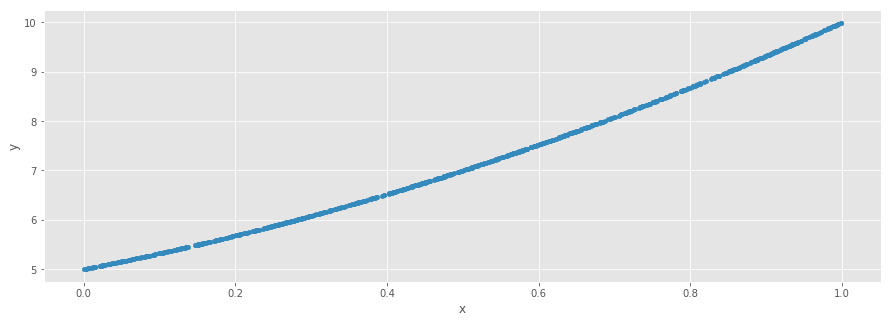

In [5]:
df.plot.scatter(x='x', y='y', figsize=(15,5));

In [6]:
# you can adjust the number of neurons in the hidden layer here
hidden_size = 1

# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32, shape=[None, 1], name="01_x")
y = tf.placeholder(tf.float32, shape=[None, 1], name="01_y")

print("shape of x and y:")
print(x.get_shape(),y.get_shape())

shape of x and y:
(?, 1) (?, 1)


In [7]:
# create your first hidden layer!
# tf.truncated_normal([how many samples do you have, size of output layer])
W1 = tf.Variable(tf.truncated_normal([1, hidden_size], mean=0.1, stddev=0.1), name="w1")

# tf.truncated_normal([size of output layer])
b1 = tf.Variable(tf.truncated_normal([hidden_size], mean=0.1, stddev=0.1), name="b1")

# shape of h1 = [size of your samples, size of output layer]
h1 = tf.nn.relu(tf.matmul(x, W1) + b1, name="h1")

print("shape of hidden layer:")
print(h1.get_shape())

shape of hidden layer:
(?, 1)


In [8]:
# Output Layer
W = tf.Variable(tf.truncated_normal([hidden_size, 1], mean=0.1, stddev=0.1), name="w")
b = tf.Variable(tf.truncated_normal([1], mean=0.1, stddev=0.1), name="b")

# note that the input comes from our hidden layer h1
pred = tf.nn.relu(tf.matmul(h1, W) + b)

print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [9]:
# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))

# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.09)
train = optimizer.minimize(loss)

# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
# initialize the variables
init = tf.global_variables_initializer()

# hold step and error values
t = []

# Run your graph
with tf.Session() as sess:
    
    # initialize variables
    sess.run(init)

    # Fit the function.
    for step in range(5000):

        # get your data
        train_data = {x:train_x, y:train_y}
        test_data = {x:test_x, y:test_y}
        
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        
        # print every n iterations
        if step%500==0:
           
            # capture the step and error for analysis
            t.append((step, train_loss))    
            
            # get snapshot of current training accuracy       
            train_acc = accuracy.eval(train_data)            
                
            print("Training loss at step %d: %f" % (step, train_loss))                              
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0],
                             'pred':test_results[:,0]})
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss'])  

Training loss at step 0: 49.841778
Training loss at step 500: 0.021844
Training loss at step 1000: 0.021844
Training loss at step 1500: 0.021844
Training loss at step 2000: 0.021844
Training loss at step 2500: 0.021844
Training loss at step 3000: 0.021844
Training loss at step 3500: 0.021844
Training loss at step 4000: 0.021844
Training loss at step 4500: 0.021844
Accuracy on the Training Set: 0.876471
Accuracy on the Test Set: 0.86


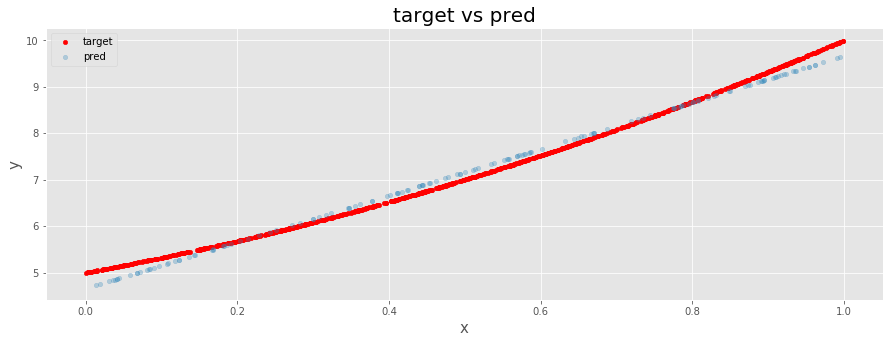

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

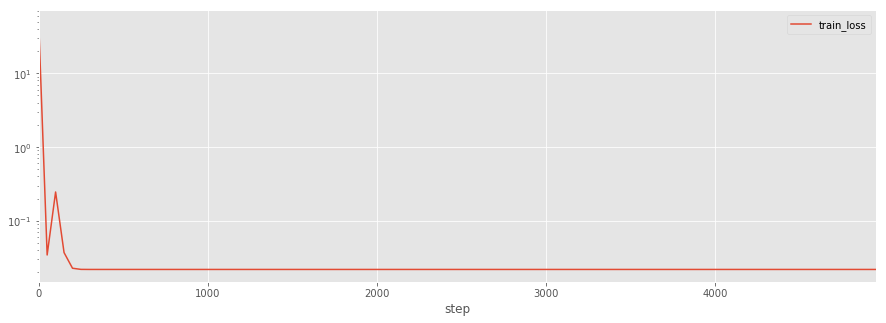

In [16]:
df_loss.set_index('step').plot(logy=True, figsize=(15,5));

shape of x and y:
(?, 1) (?, 1)
shape of hidden layer:
(?, 1)
shape of output layer:
(?, 1)
Training loss at step 0: 51.607700
Training loss at step 500: 0.022836
Training loss at step 1000: 0.021844
Training loss at step 1500: 0.021844
Training loss at step 2000: 0.021844
Training loss at step 2500: 0.021844
Training loss at step 3000: 0.021844
Training loss at step 3500: 0.021844
Training loss at step 4000: 0.021844
Training loss at step 4500: 0.021844
Accuracy on the Training Set: 0.876471
Accuracy on the Test Set: 0.86


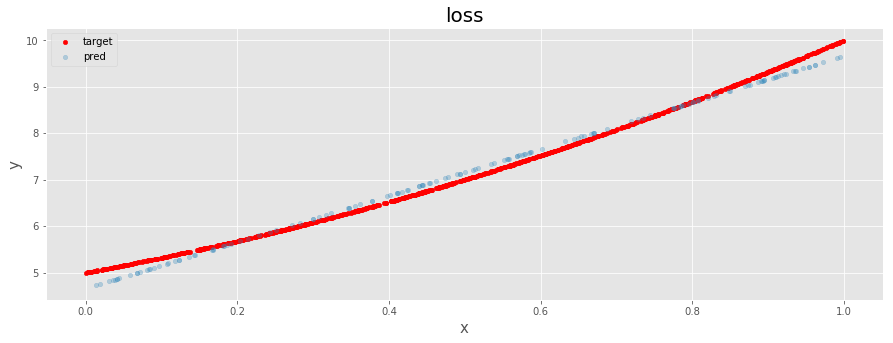

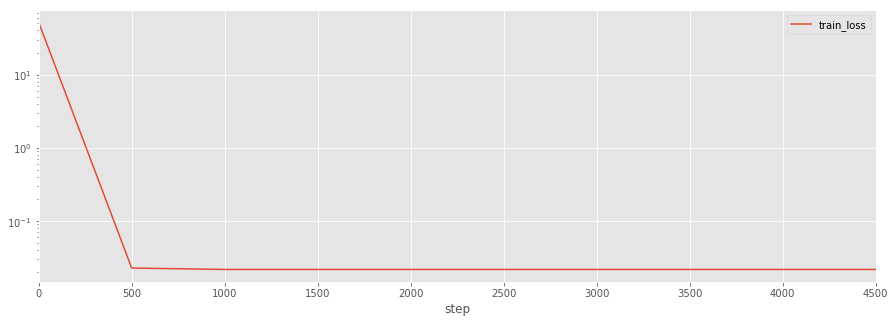

In [20]:
# you can adjust the number of neurons in the hidden layer here
hidden_size = 1

# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32, shape=[None, 1], name="01_x")
y = tf.placeholder(tf.float32, shape=[None, 1], name="01_y")

print("shape of x and y:")
print(x.get_shape(),y.get_shape())

# create your first hidden layer!
# tf.truncated_normal([how many samples do you have, size of output layer])
W1 = tf.Variable(tf.truncated_normal([1, hidden_size], mean=0.1, stddev=0.1), name="w1")

# tf.truncated_normal([size of output layer])
b1 = tf.Variable(tf.truncated_normal([hidden_size], mean=0.1, stddev=0.1), name="b1")

# shape of h1 = [size of your samples, size of output layer]
h1 = tf.nn.relu(tf.matmul(x, W1) + b1, name="h1")

print("shape of hidden layer:")
print(h1.get_shape())

# Output Layer
W = tf.Variable(tf.truncated_normal([hidden_size, 1], mean=0.1, stddev=0.1), name="w")
b = tf.Variable(tf.truncated_normal([1], mean=0.1, stddev=0.1), name="b")

# note that the input comes from our hidden layer h1
pred = tf.nn.relu(tf.matmul(h1, W) + b)

print("shape of output layer:")
print(pred.get_shape())

# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))

# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.09)
train = optimizer.minimize(loss)

# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# initialize the variables
init = tf.global_variables_initializer()

# hold step and error values
t = []

# Run your graph
with tf.Session() as sess:
    
    # initialize variables
    sess.run(init)

    # Fit the function.
    for step in range(5000):

        # get your data
        train_data = {x:train_x, y:train_y}
        test_data = {x:test_x, y:test_y}
        
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        
        # print every n iterations
        if step%500==0:
           
            # capture the step and error for analysis
            t.append((step, train_loss))    
            
            # get snapshot of current training accuracy       
            train_acc = accuracy.eval(train_data)            
                
            print("Training loss at step %d: %f" % (step, train_loss))                              
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0],
                             'pred':test_results[:,0]})
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss'])  

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)
# add a info to plot
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

df_loss.set_index('step').plot(logy=True, figsize=(15,5))
# add a info to plot
axes.set_title('loss', fontsize=20)